In [1]:
from data_cleaning import loading_data, null_values, visuals
from baseline_model import baseline
from model_training import linear_regression, extra_trees_regressor, random_forest_regressor
from model_test import linear_regression, extra_trees_regressor, random_forest_regressor, decision_trees_regressor, xgb_regressor
import seaborn as sns

We start by loading the data and merging the the two tables.

In [2]:
data = loading_data("train", "store")
data.head()

/Users/albert/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,2013-01-01,1115,2.0,0.0,0.0,0.0,0.0,a,1.0,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1,2013-01-01,379,2.0,0.0,0.0,0.0,0.0,a,1.0,d,a,6630.0,NaN,NaN,0,NaN,NaN,NaN
2,2013-01-01,378,2.0,0.0,0.0,0.0,0.0,a,1.0,a,c,2140.0,8.0,2012.0,0,NaN,NaN,NaN
3,2013-01-01,377,2.0,0.0,0.0,0.0,0.0,a,1.0,a,c,100.0,6.0,2010.0,1,18.0,2010.0,"Feb,May,Aug,Nov"
4,2013-01-01,376,2.0,0.0,0.0,0.0,0.0,a,1.0,a,a,160.0,8.0,2012.0,0,NaN,NaN,NaN


Our baseline model (mean sales) yields:

In [3]:
baseline(data)

the RMSPE of the baseline model (mean) is 0.6163


Before using more sophistaced models, we have a closer look at the featurs:

1) How many null values do they contain?

2) How do they correlate with the target value?

In [4]:
null_values(data)

Column DayOfWeek has 2.9811% missing values 

Column Sales has 2.9823% missing values 

Column Customers has 2.9938% missing values 

Column Open has 3.014% missing values 

Column Promo has 3.0207% missing values 

Column StateHoliday has 3.0074% missing values 

Column SchoolHoliday has 3.0376% missing values 

Column CompetitionDistance has 0.2644% missing values 

Column CompetitionOpenSinceMonth has 31.7605% missing values 

Column CompetitionOpenSinceYear has 31.7605% missing values 

Column Promo2SinceWeek has 49.0959% missing values 

Column Promo2SinceYear has 49.0959% missing values 

Column PromoInterval has 49.0959% missing values 



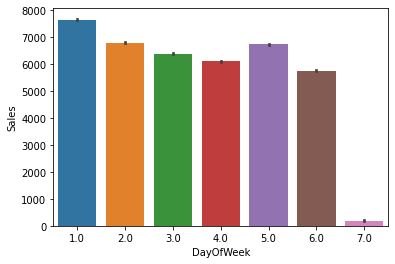

In [5]:
sns.barplot(x = "DayOfWeek", y = "Sales", data = data)

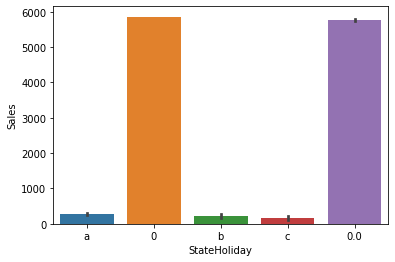

In [6]:
sns.barplot(x = "StateHoliday", y = "Sales", data = data)

After dropping columns and encoding features, the data is ready to be fed to some models:

1) linear regression with feature scaling

2) extra trees

3) random forest

4) xgboost

In [7]:
linear_regression(data)

the RMSPE of the linear regression model is 0.1579


In [8]:
extra_trees_regressor(data)

the RMSPE of the extra trees model is 0.1393


In [9]:
random_forest_regressor(data)

the RMSPE of the random forest model is 0.1243


In [10]:
xgb_regressor(data)

/Users/albert/anaconda3/lib/python3.8/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:11:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
the RMSPE of the decision trees regressor model is 0.1171


In [11]:
#min = 1
#estimators = 150
#max_depth = 10
#for i in range(10, 150, 10):
#    for j in range(3, 10):
#        if extra_trees_regressor(data, i, j) < min:
#            min = extra_trees_regressor(data, i, j)
#            estimators = i
#            max_depth = j
#print(min, estimators, max_depth)
